In [51]:
import matplotlib.pyplot as plt
import numpy as np
from pickleshare import *

In [52]:
db = PickleShareDB(os.path.join(os.getcwd(),'SharedVars'))

The data in variable "continous_data_in" is taken from continous_data variable from Question1.ipynb and data in variable "continous_data_out" is taken from continous_data variable from Question4.ipynb file <br><br>
It contains data of all the month from all the years in a continous format, i.e. first 12 values are from Jan 2013 to Dec 2013, the next 12 are from Jan 2014 to Dec 2014 and so on...

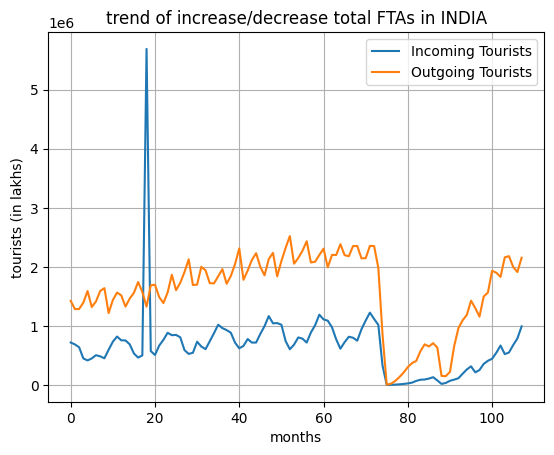

In [53]:
continous_data_in = db['q1/monthly FTA data']
continous_data_out = db['q4/monthly departure data']
plt.plot(continous_data_in, label = "Incoming Tourists")
plt.plot(continous_data_out, label = "Outgoing Tourists")
plt.title("trend of increase/decrease total FTAs in INDIA")
plt.xlabel("months")
plt.ylabel("tourists (in lakhs)")
plt.legend()
plt.grid(True)  
plt.show()

As you can see there is an ourlier that occurs in July 2014 where FTAs in a single mont is more than 5 lakhs. We will replace that value in above array by mean of July 2013 and July 2016(beacuse we don't have data for 2015) to maintain uniformity.

In [54]:
## 0-based indexing is used
## calculating index of different months of different years
j2014 = 12*1+6 # 12 months multiplied with index of year 2014 in all years + index of july
j2013 = 12*0+6 # Similar logic
j2016 = 12*2+6 # index of year 2016 is 2 because 2015 does not exist in our data

continous_data_in[j2014] = (continous_data_in[j2013]+continous_data_in[j2016])/2

In [55]:
## create x-axis label
years = ['2013','2014','2016','2017','2018','2019','2020','2021','2022']
months = ["January", "February", "March", "April", "May", "June", "July", "August", 
          "September", "October", "November", "December"]
xlabel = []
for y in years:
    for m in months:
        xlabel.append(f'{m[:3]+y[-2:]}')

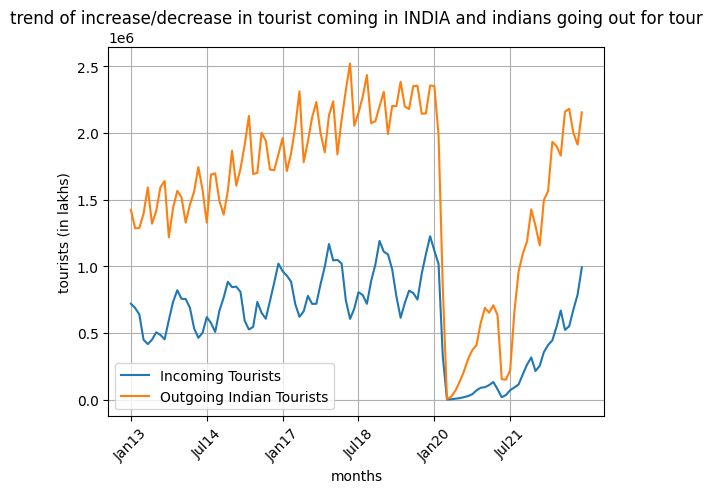

In [67]:
plt.plot(xlabel,continous_data_in, label = "Incoming Tourists")
plt.plot(xlabel,continous_data_out, label = "Outgoing Indian Tourists")
plt.title("trend of increase/decrease in tourist coming in INDIA and indians going out for tour")
plt.xlabel("months",)
plt.ylabel("tourists (in lakhs)")
num_ticks = 6  # Change this to adjust the number of labels shown
plt.xticks(np.arange(0, len(xlabel), len(xlabel) // num_ticks), rotation=45) # to unclutter the x-axis labels
plt.grid(True) 
plt.legend() 
plt.show()

Now you can see the FTAs in India follow a consistent pattern. There are regular peaks and drops in the data corresponding to each year's busy and quiet months. Infact the overall data before the sudden drop had a positive slope showing steady rise in no. of foreign toruists coming to India each year.<br><br>But at a later point in graph we see sudden drop in tourists coming to and inidan tourists leaving from India. That marks the start of the <b>Nation wide Lockdown</b> period which persisted for around a year. After a year we again start to see gradual rise in FTAs as India and other countries open their international borders and ports(both air and sea) and tourists also feel confident enough for international travels

In [66]:
purpose_data = db['q3/purpose-wise FTA data']
years_in_purpose_data = ['2013', '2016','2017','2018','2019','2020','2021','2022']

business_tourists = []
leisure_tourists = []
medical_tourists = []
indian_diaspora = []
other = []

for y in years_in_purpose_data:
    y_data = purpose_data[f'{y}']['overall']
    total = y_data[1]
    business_tourists.append(round(y_data[2]*total))
    leisure_tourists.append(round(y_data[3]*total))
    medical_tourists.append(round(y_data[4]*total))
    indian_diaspora.append(round(y_data[5]*total))
    other.append(round(y_data[6]*total))

In [63]:
print(business_tourists)

[564056, 1406308, 1401729, 1793150, 791488, 329010, 183117, 643014]


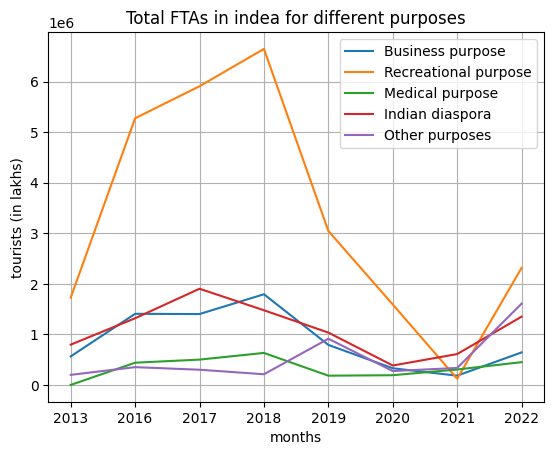

In [64]:
plt.plot(years_in_purpose_data,business_tourists, label = "Business purpose")
plt.plot(years_in_purpose_data,leisure_tourists, label = "Recreational purpose")
plt.plot(years_in_purpose_data,medical_tourists, label = "Medical purpose")
plt.plot(years_in_purpose_data,indian_diaspora, label = "Indian diaspora")
plt.plot(years_in_purpose_data,other, label = "Other purposes")

plt.title("Total FTAs in indea for different purposes")
plt.xlabel("months",)
plt.ylabel("tourists (in lakhs)")
# num_ticks = 6  # Change this to adjust the number of labels shown
# plt.xticks(np.arange(0, len(xlabel), len(xlabel) // num_ticks), rotation=45) # to unclutter the x-axis labels
plt.grid(True) 
plt.legend() 
plt.show()

The graph of purpose-wise visits at first glance seems to represent the obvious facts. 
Since most of the tourists to India came for recreational purposes, the graph for it showed steepest decline. But on looking closely there are some things that are not obvious. <br><br>
<i>Question 1</i><br>
Covid hit the world in early days of 2020, why is the no. of recreational tourists still high and infact comparable to no. of recreational tourists in 2013?<br>
<i>Answer : </i><br>
Looking at the previous graph of "trend of increase/decrease in tourist coming in INDIA and indians going out for tour", it can be seen that winter holidays (especially Decembers and Januarys) are busiest months in terms of incoming foreign tourists. The country was locked down at the end of march 2020, by then a non-trivial portion of yearly tourist had already visited the country in first three months of the year.<br><br>
<i>Question 2</i><br>
It can be seen that all the graphs had already started declining in 2019 itself, why?<br>
<i>Answer : </i><br>
One of the reasons for such decline can be attributed to the fact that earliest confirmed cases of covid date back to <b>November 2019</b>, i.e. at the begining of winter holidays of 2019 and the news of a new spreading disease cautioned some would-be tourists. Other reasons could be political instability in Europe in 2019 due to Brexit and due to global and indian economies slowing down in 2019.

Also it can be seen that the recovery for the recreational-purposes tourism saw very late growth. When the graph related to other purposes slowly started recovering in 2021, the graph of recreational tourism still remained virtually on zero. This represent the general mindset of people at that time which was <i>not to go out until absolutely necessary</i>.